# Demo: Ingestão de dados com JuliaDB
https://stooq.com/db/h/

In [2]:
using Pkg

Pkg.add("Dates");
Pkg.add("Plots");
Pkg.add("JuliaDB");
Pkg.add("Statistics");
Pkg.add("JuliaDBMeta");
Pkg.add("OnlineStats");
Pkg.add("IndexedTables")

using Dates
using Plots
using JuliaDB
using Statistics
using OnlineStats
using IndexedTables

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [=====>                                   ]  10.4 %>                             ]  25.4 %>                      ]  43.5 %>               ]  60.8 %Fetching: [==============================>          ]  73.3 %>    ]  88.2 %Fetching: [======================================>  ]  93.3 % Resolving package versions...
 Installed ZeroMQ_jll ─────── v4.3.2+0
 Installed StatsFuns ──────── v0.9.4
 Installed SpecialFunctions ─ v0.10.0
 Installed DiffRules ──────── v1.0.1
 Installed CuArrays ───────── v1.7.2
  Updating `~/.julia/environments/v1.3/Project.toml`
  [ade2ca70] + Dates 
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [3a865a2d] ↑ CuArrays v1.7.1 ⇒ v1.7.2
  [b552c78f] ↑ DiffRules v1.0.0 ⇒ v1.0.1
  [276daf66] ↑ SpecialFunctions v0.9.0 ⇒ v0.10.0
  [4c63d2b9] ↑ StatsFuns v0.9.3 ⇒ v0.9.4


In [3]:
cd("/home/romerito/Documents/data/currencies")

files = glob("*.txt", pwd())

1928-element Array{String,1}:
 "/home/romerito/Documents/data/currencies/arsaud.txt"
 "/home/romerito/Documents/data/currencies/arsbgn.txt"
 "/home/romerito/Documents/data/currencies/arsbrl.txt"
 "/home/romerito/Documents/data/currencies/arsbtc.txt"
 "/home/romerito/Documents/data/currencies/arscad.txt"
 "/home/romerito/Documents/data/currencies/arschf.txt"
 "/home/romerito/Documents/data/currencies/arsclp.txt"
 "/home/romerito/Documents/data/currencies/arscny.txt"
 "/home/romerito/Documents/data/currencies/arsczk.txt"
 "/home/romerito/Documents/data/currencies/arsdkk.txt"
 "/home/romerito/Documents/data/currencies/arsegp.txt"
 "/home/romerito/Documents/data/currencies/arseur.txt"
 "/home/romerito/Documents/data/currencies/arsgbp.txt"
 ⋮                                                    
 "/home/romerito/Documents/data/currencies/zarsek.txt"
 "/home/romerito/Documents/data/currencies/zarsgd.txt"
 "/home/romerito/Documents/data/currencies/zarthb.txt"
 "/home/romerito/Documents/data/cur

### lendo as 10 primeiras linhas do primeiro arquivo do diretorio `files`

In [7]:
;head $(files[1])

Date,Open,High,Low,Close,Volume,OpenInt
19960806,1.3546,1.3546,1.3546,1.3546,0,0
19960807,1.353,1.353,1.353,1.353,0,0
19960808,1.3495,1.3495,1.3495,1.3495,0,0
19960809,1.3486,1.3486,1.3486,1.3486,0,0
19960812,1.3503,1.3503,1.3503,1.3503,0,0
19960813,1.3483,1.3483,1.3483,1.3483,0,0
19960814,1.3487,1.3487,1.3487,1.3487,0,0
19960815,1.3427,1.3427,1.3427,1.3427,0,0
19960816,1.3406,1.3406,1.3406,1.3406,0,0


### descobrindo o tamanho total dos arquivos

In [9]:
println(round(sum(filesize, files) / 1024^3, digits=6)," MiB")

0.50994 MiB


### fazendo a `Ingestão` de 1928 arquivos .txt

In [10]:
@time ingestao = loadtable(files, output="database", chunks=1000,
                           header_exists=false,
                           colnames=["Date","Open","High","Low","Close","Volume","OpenInt"], 
                           colparsers=Dict(1 => dateformat"yyyymmdd"),
                           skiplines_begin=1,
                           indexcols=[1])

132.979081 seconds (405.06 M allocations: 13.888 GiB, 2.14% gc time)


Distributed Table with 12821710 rows in 1000 chunks:
Date                 Open     High     Low      Close    Volume  OpenInt
────────────────────────────────────────────────────────────────────────
1996-08-06T00:00:00  1.3546   1.3546   1.3546   1.3546   0       0
1996-08-06T00:00:00  0.19926  0.19926  0.19926  0.19926  0       0
1996-08-07T00:00:00  1.353    1.353    1.353    1.353    0       0
1996-08-07T00:00:00  0.20009  0.20009  0.20009  0.20009  0       0
1996-08-08T00:00:00  1.3495   1.3495   1.3495   1.3495   0       0
1996-08-08T00:00:00  0.20008  0.20008  0.20008  0.20008  0       0
1996-08-09T00:00:00  1.3486   1.3486   1.3486   1.3486   0       0
1996-08-09T00:00:00  0.20046  0.20046  0.20046  0.20046  0       0
1996-08-12T00:00:00  1.3503   1.3503   1.3503   1.3503   0       0
1996-08-12T00:00:00  0.20071  0.20071  0.20071  0.20071  0       0
1996-08-13T00:00:00  1.3483   1.3483   1.3483   1.3483   0       0
1996-08-13T00:00:00  0.20055  0.20055  0.20055  0.20055  0      

### setando o diretório de trabalho

In [3]:
cd("/home/romerito/Documents/data/currencies/database")

In [4]:
;du -hs /home/romerito/Documents/data/currencies/database

688M	/home/romerito/Documents/data/currencies/database


### carregando os dados na memória

In [5]:
@time db = load(pwd())

  0.875569 seconds (1.01 M allocations: 50.714 MiB, 1.79% gc time)


Distributed Table with 12821710 rows in 1000 chunks:
Date                 Open     High     Low      Close    Volume  OpenInt
────────────────────────────────────────────────────────────────────────
1996-08-06T00:00:00  1.3546   1.3546   1.3546   1.3546   0       0
1996-08-06T00:00:00  0.19926  0.19926  0.19926  0.19926  0       0
1996-08-07T00:00:00  1.353    1.353    1.353    1.353    0       0
1996-08-07T00:00:00  0.20009  0.20009  0.20009  0.20009  0       0
1996-08-08T00:00:00  1.3495   1.3495   1.3495   1.3495   0       0
1996-08-08T00:00:00  0.20008  0.20008  0.20008  0.20008  0       0
1996-08-09T00:00:00  1.3486   1.3486   1.3486   1.3486   0       0
1996-08-09T00:00:00  0.20046  0.20046  0.20046  0.20046  0       0
1996-08-12T00:00:00  1.3503   1.3503   1.3503   1.3503   0       0
1996-08-12T00:00:00  0.20071  0.20071  0.20071  0.20071  0       0
1996-08-13T00:00:00  1.3483   1.3483   1.3483   1.3483   0       0
1996-08-13T00:00:00  0.20055  0.20055  0.20055  0.20055  0      

In [6]:
@time table = select(db, Not(:OpenInt))

131.051299 seconds (36.10 M allocations: 2.619 GiB, 2.21% gc time)


Distributed Table with 12821710 rows in 1000 chunks:
Date                 Open     High     Low      Close    Volume
───────────────────────────────────────────────────────────────
1996-08-06T00:00:00  1.3546   1.3546   1.3546   1.3546   0
1996-08-06T00:00:00  0.19926  0.19926  0.19926  0.19926  0
1996-08-07T00:00:00  1.353    1.353    1.353    1.353    0
1996-08-07T00:00:00  0.20009  0.20009  0.20009  0.20009  0
1996-08-08T00:00:00  1.3495   1.3495   1.3495   1.3495   0
1996-08-08T00:00:00  0.20008  0.20008  0.20008  0.20008  0
1996-08-09T00:00:00  1.3486   1.3486   1.3486   1.3486   0
1996-08-09T00:00:00  0.20046  0.20046  0.20046  0.20046  0
1996-08-12T00:00:00  1.3503   1.3503   1.3503   1.3503   0
1996-08-12T00:00:00  0.20071  0.20071  0.20071  0.20071  0
1996-08-13T00:00:00  1.3483   1.3483   1.3483   1.3483   0
1996-08-13T00:00:00  0.20055  0.20055  0.20055  0.20055  0
1996-08-14T00:00:00  1.3487   1.3487   1.3487   1.3487   0
1996-08-14T00:00:00  0.20137  0.20137  0.20137  0.20

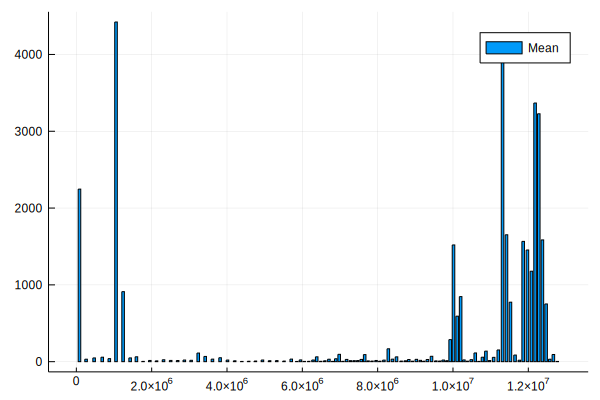

In [7]:
partitionplot(table, :Open; stat = Mean(), seriestype = :bar)